# NRE1 - Assignment 2

**Note**: This notebook is a graded assignment. It counts **25% to your final mark** in the exercise with **25 points** to be achieved in total, plus an additional **5 bonus points**! You can work on this assignment alone or together in a group of two. 

**Please upload your assignment on L²p.**

Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says:
```python
# YOUR CODE HERE
```
or

    YOUR ANSWER HERE

You need to delete every line of code that says:
```python
raise NotImplementedError()
```

Please fill in your name (and of your fellow student, if you submit together), and according matriculation number below. If you are more than one student, separate by a comma **,**

In [1]:
NAME = ""
MATNUM = ""

In [1]:
# here the usual imports:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preliminaries

In this assignment notebook, you will **apply your new knowledge about functions and plot generation** together with the **efficient numerical methods** implemented in the `numpy` module to solve problems related to regression and interpolation in space. The focus of this assignment will be to implement new programming concepts and to apply those to problems we discussed in class.

One more remark on the IPython notebooks: the "standard layout" is a bit plain and the "endless text cells" can be a bit annoying. I created a little css style-sheet (called `nre1_style.css`) and uploaded it to L2P. If you download this file and place it in the same folder as this notebook, then you can adjust the notebooks style when you execute the following cell (after removing the #'s):


In [5]:
#from IPython.core.display import HTML
#css_file = 'nre1_style.css'
#HTML(open(css_file, "r").read())

## Task 1: linear interpolation with vectorised functions

You learned about the use of efficient numerical methods in the exercise notebook on the `numpy` module. One of the most important aspects of the `numpy` module is the use of vectors and functions that operate directly on these vectors, the so-called "vectorised functions".

One main point that you should always have in your mind is that it is better to use vectorised functions instead of loops, whenever this is possible. In your first assignment task, you will test the higher efficiency with a linear interpolation function and compare it to the implementation with loops of the first assignment.

Recall the equations that we derived for linear regression:

$$n a_0 + a_1 \sum_{i=1}^n x_i = \sum_{i=1}^n y_i$$

$$ a_0 \sum_{i=1}^n x_i + a_1 \sum_{i=1}^n x_i^2 = \sum_{i=1}^n x_i y_i$$

**Your task (5 pts)**: complete the function below to perform the summation operations with vectorised functions instead of the loops and solve the system of linear equations:


In [2]:
def lin_regression_vectorised(x, y):
    """Perform linear regression with vectorised numpy functions
    
    **Arguments**:
    
    x : numpy-array with x-values
    y : numpy-array with y-values
    
    **Returns**:
    
    (a0, a1) : tuple of two numbers
    """    
    ### BEGIN SOLUTION
    # implement the required summations:
    sum_x_i = np.sum(x)
    sum_y_i = np.sum(y)
    sum_x_i_squared = np.sum(x * x)
    sum_x_i_y_i = np.sum(x * y)
    
    # this step solves the system of linear equations:
    a0, a1 = np.linalg.solve([[len(x), sum_x_i],[sum_x_i, sum_x_i_squared]], [sum_y_i, sum_x_i_y_i])

    return a0, a1
    ### END SOLUTION

In [3]:
# Cell used for autograding. DO NOT EDIT!
### BEGIN HIDDEN TESTS
assert lin_regression_vectorised (np.arange(0.,5.), np.arange(5.,10.)) == (5., 1.)
### END HIDDEN TESTS

In [7]:
lin_regression_vectorised(np.arange(0.,5.), np.arange(5.,10.))# == (5., 1.)

(5.0, 1.0)

For comparison of the two implementations, complete the following function to perform the sums with loops (note: this is mostly copy-and-paste if you successfully finished the first assignment):

In [9]:
def lin_regression_loops(x, y):
    """Perform linear regression with basic python loops    
    
    **Arguments**:
    
    x : python list or numpy-arary with x-values
    y : python list or numpy-array with y-values
    
    **Returns**:
    
    (a0, a1) : tuple of two numbers
    """
    # YOUR CODE HERE  
    sum_x_i = 0
    sum_y_i = 0
    sum_x_i_squared = 0
    sum_x_i_y_i = 0

    for i in range(len(x)):
        sum_x_i = sum_x_i + x[i]
        sum_y_i = sum_y_i + y[i]
        sum_x_i_squared = sum_x_i_squared + x[i]**2
        sum_x_i_y_i = sum_x_i_y_i + x[i] * y[i]
        
    a0, a1 = np.linalg.solve([[len(x), sum_x_i],[sum_x_i, sum_x_i_squared]], [sum_y_i, sum_x_i_y_i])
    return a0, a1

As a little test, use the data in the following two arrays to test your functions:

In [10]:
x = np.array([1., 2., 3., 4., 5., 6., 7.])
y = np.array([0.42, 2.32, 2.12, 4.31, 3.45, 5.92, 5.59])
print(lin_regression_loops(x, y))
print(lin_regression_vectorised(x, y))

(0.012857142857143693, 0.85857142857142832)
(0.012857142857143693, 0.85857142857142832)


If you compare the code of the vectorised function with the implementation with loops you can see another advantage of using vectorised functions: they usually provide a clearer and more easy to read implementation. Basically, it is often possible to write equations in code almost as you would write them down on paper. We will see more of this behaviour in the future.

## Task 2 (5 pts): Comparing execution time

I stated above that vectorised functions are more efficent than loops and that you should use them when you can. However, I didn't provide a proof for this statement, yet. So in this task, you will use the `%%timeit` function to compare the execution time of the two functions and to test my claim.

Recall: The `%%timeit` function is a so-called "magic function". These functions are extensions to basic Python functions which are only available in IPython and they usually perform operations for one code cell. To call the `%%timeit` function, you write it in the top of a code cell and then add the lines of codes for which you want to check the execution time. These lines are then executed a couple of times to obtain a good approximation.

Here is an example to test the execution time of a function:

In [15]:
%%timeit 
# calculate the sine for a number of values:
x_vals = np.linspace(0,2*np.pi,1000)
np.sin(x_vals)

15.8 µs ± 99.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As you can see from the output, the lines of code are executed a number of times (in my case: 10000 times) to obtain a reasonable measure of execution speed, which is in the order of 10-25 micro-seconds.

**Your task (2 pts)**: use the `%timeit` command with your code to test the execution time of the linear regression implementation with loops and with vectorised functions:

In [17]:
# YOUR CODE HERE
%timeit lin_regression_loops(x, y)
%timeit lin_regression_vectorised(x, y)

22.4 µs ± 397 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25.9 µs ± 466 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
x = np.array(np.arange(0,1000,0.5))
y = np.array(np.arange(1000,2000,0.5))

In [19]:
# YOUR CODE HERE
%timeit lin_regression_loops(x, y)
%timeit lin_regression_vectorised(x, y)

2.02 ms ± 256 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
41.8 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


What did you observe? Which execution is faster? 

**Your task (1 pt)**: Describe your results in the following text cell:

Your answer here! Describe your results.

You may have realised that the results are a bit unexpected. The reason is that calling the vectorised functions requires a small amount of additional time. This means that the functions are mainly efficient for large arrays.

To test the execution time for larger vectors, we will first generate some random example data:

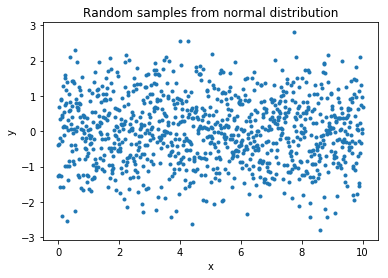

In [20]:
# test with a longer vector:
n_samples = 1000 # define number of samples
# generate linearly spaced samples between 0 and 10:
x = np.linspace(0,10,n_samples) 
# draw random values from standard normal distribution (zero mean):
y = np.random.randn(n_samples)
# and we create a plot to visualise our samples:
plt.plot(x,y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random samples from normal distribution')

**Your task (2 pts)**: Evaluate execution time for the two functions as before and discuss the results: 

In [21]:
# YOUR CODE HERE
%timeit lin_regression_loops(x, y)
%timeit lin_regression_vectorised(x, y)

1.19 ms ± 12.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
31 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Your answer here! Describe your results.

## Task 3: Linear interpolation with Lagrange interpolation

We discussed the formulation of Lagrange interpolating polynomials during the lecture. An big advantage of these polynomials is that the computational implementation is very straight-forward.

As usual, we want to obtain an estimate for an unknown value $f(x)$ at position $x$ from observations $x_i$ with a linear combination:

$$f_n(x) = \sum_{i=0}^n L_i(x), f(x_i) \mbox{ ,}$$

where $L_i$ are the weights:

$$L_i(x) =  \prod_{j = 0, j \ne i}^n \frac{x - x_j}{x_i - x_j}$$

The first-order linear interpolation is obtained if we set $n = 1$ as:

$$f_1(x) = \frac{x - x_1}{x_0 - x_1} f(x_0) + \frac{x - x_0}{x_1 - x_0} f(x_1)$$

**Your task (4 pts)**: Complete the function below to approximate the value at a position x given two known values  $f(x_0)$ and $f(x_1)$:



In [11]:
def linear_interp(x_0, x_1, f_x_0, f_x_1, x):
    """Approximate the value at position x using linear interpolation
    
    **Arguments**:
    
    x_0 : position of first point
    f_x_0 : value at first point
    x_1 : position of second point
    f_x_1 : value at second point
    x : position of value to be approximated

    **Returns**:
    
    f_x : approximated value
    """
    ### BEGIN SOLUTION
    # include code to determine f_x
    f_x = (x - x_1) / (x_0 - x_1) * f_x_0 + (x - x_0) / (x_1 - x_0) * f_x_1
    return f_x
    ### END SOLUTION

In [12]:
# Cell used for autograding. DO NOT EDIT!
### BEGIN HIDDEN TESTS
assert linear_interp(1., 2., 3., 5., 8.) == 17.
assert linear_interp(13., 21., 34., 55., 89.) == 233.5
### END HIDDEN TESTS

Test your implementation for a couple of values where you know the expected results:

In [13]:
print(linear_interp(0,1,0,1,0.5))

0.5


Now that we have this function, we can use it to perform piecewise linear interpolation between a set of points. We now consider three points $x_0, x_1$ and $x_2$. If we want to obtain the approximate value for a point $x$ inbetween these three points, we have to perform the following steps:

1. Check if the point is within our point range ($x_0 \le x \le x_2$), if not: do not perform interpolation

2. Determine if the position of the point $x$ is between points $x_0$ and $x_1$ or between $x_1$ and $x_2$. 

3. Perform the interpolation in the appropriate interval

**Your task (3 pts)**: complete the function below to perform the interpolation:

In [14]:
def linear_interp_three_points(x_0, x_1, x_2, f_x_0, f_x_1, f_x_2, x):
    """Approximate the value at position x using linear interpolation
    
    **Arguments**:
    
    x_0 : position of first point
    f_x_0 : value at first point
    x_1 : position of second point
    f_x_1 : value at second point
    x_2 : position of third point
    f_x_2 : value at third point
    x : position of value to be approximated
    
    **Returns**:
    
    f_x : approximated value
    """
    ### BEGIN SOLUTION
    if (x < x_0) or (x > x_2):
        print("Point not in range!")
        return None
    
    elif (x < x_1):
        f_x = linear_interp(x_0, x_1, f_x_0, f_x_1, x)
    else:
        f_x = linear_interp(x_1, x_2, f_x_1, f_x_2, x)
    
    return f_x
    ### END SOLUTION

In [15]:
# Cell used for autograding. DO NOT EDIT!
### BEGIN HIDDEN TESTS
assert linear_interp_three_points(1, 2, 3, 1, 2, 3, 2.5) == 2.5
assert linear_interp_three_points(2, 4, 8, 3, 4, 1, 5.5) == 2.875
### END HIDDEN TESTS

In [16]:
# To test your code, try some examples:
# first, define some points and values:
x_0 = 0
x_1 = 1
x_2 = 2
f_x_0 = 0
f_x_1 = 1
f_x_2 = 0
# and now the position to be approximated:
x = 0.5
print(linear_interp_three_points(x_0, x_1, x_2, f_x_0, f_x_1, f_x_2, x))

0.5


We now have a method to interpolate between three points. A good way to test interpolation functions is to create a plot of the results.

**Your task (3 pts)**: Create a plot which includes the defined points and the approximated value at the given position (and try it for a couple of values of $x$). **To get full points, don't forget to add axis labels and a title**:

*Hint: if you don't see your points because they are directly at the borders of the plot, you can extend the plot range with the `plt.xlim()`, `plt.ylim()` functions.*



Text(0.5,1,'Linear interpolation between three points')

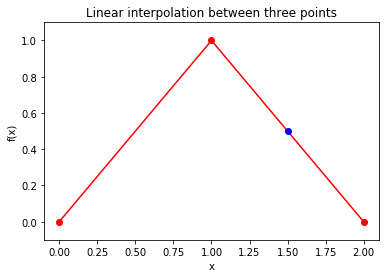

In [17]:
### BEGIN SOLUTION
x = 1.5
plt.plot([x_0, x_1, x_2], [f_x_0, f_x_1, f_x_2], 'r-o')
plt.xlim([-0.1,2.1])
plt.ylim([-0.1, 1.1])
plt.plot(x, linear_interp_three_points(x_0, x_1, x_2, f_x_0, f_x_1, f_x_2, x), 'bo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Linear interpolation between three points")
### END SOLUTION

You probably noticed a simple pattern when you implemented the function above. Can you imagine how to extend the function to multiple input points and values, passed as `numpy` arrays?

**Bonus task (3 pts)**: extend your function for interpolation and visualisation to perform linear interpolation for an arbitrary number of points (with values passed as Python lists or numpy arrays).

In [18]:
def linear_interp_arbitrary_points(p, f_p, x):
    """Approximate the value at position x using linear interpolation
    
    **Arguments**:
    
    p : list or numpy array with positions of points
    f_p : list or numpy array with values of points
    x : position of value to be approximated
    
    **Returns**:
    
    f_x : approximated value
    """
    ### BEGIN SOLUTION
    if (x < p[0]) or (x > p[-1]):
        return "Point not in range!"
    else:
        for i in range(len(p)):
                if p[i-1]< x < p[i]:
                    f_x = linear_interp(p[i-1], p[i], f_p[i-1], f_p[i], x)
                    return (f_x)
                elif x == p[i]:
                    return f_p[i]
    ### END SOLUTION

In [19]:
# Cell used for autograding. DO NOT EDIT!
### BEGIN HIDDEN TESTS
assert linear_interp_arbitrary_points(np.arange(0,9), np.linspace(0, 4, 9), 7) == 3.5
assert linear_interp_arbitrary_points([1,3,4,5,6,7,8], [5, 7, 8, 23, 5, 2, 0], 7) == 2
### END HIDDEN TESTS

## Task 4: Determination of coefficients and dip direction and dip of a plane

Imagine that you are on a geological mapping campaign and that you observe a geological boundary at three points. You assume that the boundary is a flat plane and you would like to know the strike/ dip of this plane. 

This is a classical spatial interpolation problem (often called the "three-point-problem") and there are several possibilities to obtain a result (and maybe you discussed some in your geological mapping classes). You will here use the methods of linear interpolation that we discussed during the lecture.

We denote the positions of our observation points (i.e. the $x$-, $y$-coordinates) as:

$$x_i, y_i \mbox{ for } i \in {0,1,2}$$

And the $z$ value of our observation is the dependent value:

$$z_i = f(x_i,y_i) \mbox{ for } i \in {0,1,2}$$

We can then write the equations for first-order linear interpolation as:

$$z_0 = a_0 + a_1 x_0 + a_2 y_0$$
$$z_1 = a_0 + a_1 x_1 + a_2 y_1$$
$$z_2 = a_0 + a_1 x_2 + a_2 y_2$$

Or in matrix form as:

$$\left[ \begin{array}{ccc}
1 & x_0 & y_0 \\
1 & x_1 & y_1 \\
1 & x_2 & y_2 \end{array} \right]
\left\{ \begin{array}{ccc}
a_0 \\
a_1 \\
a_2 \end{array} \right\}
=
\left\{ \begin{array}{ccc}
z_0 \\
z_1 \\
z_2 \end{array} \right\}
$$

We now need a method to solve this equation for the vector with the unknown $a_i$'s. One convenient method to solve these types of equations is implemented in the `numpy` method `np.linalg.solve()`. For example, if the matrix is stored in variable `B`, and the z-values in an array variable `z`, and the a-values in variable `a` so that we can write the equation in the form:

$$B a = z$$

Then we can obtain the results of `a` as:

```python
(a_0, a_1, a_2) = np.linalg.solve(B, z)
```

Going back to the equations at the beginning, you can see that we now have the slope values in $x$- and $y$- direction (partial derivatives for each axis) stored in the variables $a_1$ and $a_2$. We can use these results to obtain the structural geological (dip-direction/ dip) values using the following equations:

```python
maxslope = np.sqrt(a_1**2 + a_2**2)
dip = np.arctan(maxslope) / np.pi * 180.
dip_direction = np.abs(np.arctan2(-a_1, -a_2)) /  np.pi * 180.
```

**Your task (5 pts)**: Complete the function below to calculate and print out dip-direction and dip values given three points with (x,y,z) values: 

In [20]:
def calculate_dip_direction_dip(p_0, p_1, p_2):
    """Calculate dip direction and dip of a plane
    
    **Arguments**:
    
    p_0 = (x_0, y_0, z_0) : coordinates of first point
    p_1 = (x_1, y_1, z_1) : coordinates of second point
    p_2 = (x_2, y_2, z_2) : coordinates of third point

     **Returns**:
    
    dip_direction, dip : tuple of two numbers
    """
    ### BEGIN SOLUTION
    (x_0, y_0, z_0) = p_0
    (x_1, y_1, z_1) = p_1
    (x_2, y_2, z_2) = p_2  
    
    # assemble matrices:
    B = np.array([[1, x_0, y_0],
                   [1, x_1, y_1],
                   [1, x_2, y_2]])

    z = np.array([z_0, z_1, z_2])
    (a_0, a_1, a_2) = np.linalg.solve(B, z)
    
    # calculate dip and azimuth:
    maxslope = np.sqrt(a_1**2 + a_2**2)
    dip = np.arctan(maxslope) / np.pi * 180.
    dip_direction = np.abs(np.arctan2(-a_1, -a_2)) /  np.pi * 180.
    return dip_direction, dip
    #print("(%05.1f/%.1f)" % (dip_direction, dip))
    ### END SOLUTION

In [22]:
# Cell used for autograding. DO NOT EDIT!
### BEGIN HIDDEN TESTS
assert calculate_dip_direction_dip([0, 0, 0],[1, 0, 0],[0, 1, -1]) == (0, 45)
### END HIDDEN TESTS

In [23]:
# test your implementation:
p_0 = (0,0,0)
p_1 = (1,0,0)
p_2 = (0,1,-1)
calculate_dip_direction_dip(p_0, p_1, p_2)

(0.0, 45.0)

**Bonus task (2 pts)**: Create a plot to visualise the original points, the interpolated plane, and indicate the calculated dip direction and dip values. Ideally, this is visualised in 3-D plots (we will discuss 3-D plots in the next exercise), but 2-D plots are also possible

YOUR BONUS CODE HERE

In [ ]:
import matplotlib.patches as mpatches

# extracting x,y,z values again
points = np.column_stack((np.array(p_0),np.array(p_1),np.array(p_2)))
x_vals = points[0,:]
y_vals = points[1,:]
z_vals = points[2,:]

# repeating the linear interpolation
B = np.ones((3,3))
B[:,1] = x_vals
B[:,2] = y_vals

a = np.linalg.solve(B, z_vals)


# creating a meshgrid of given x,y values and calculating Z_grid 
x_grid = np.arange(-2,2.5,0.5)
y_grid = np.arange(-2,2.5,0.5)

(X_grid, Y_grid) = np.meshgrid(x_grid, y_grid)

Z_grid = a[0]+X_grid*a[1]+Y_grid*a[2]

# obtaining the dip and dip direction for annotation in the plot
(dip, dip_dir) = calculate_dip_direction_dip(p_0, p_1, p_2)


# finally, the plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
plot_points, = ax.plot(x_vals, y_vals, z_vals, 'o', color='#19647E', label='Original points')
ax.plot_surface(X_grid, Y_grid, Z_grid, color='#119DA4', shade=False)
# labeling of the surface did not work, creating a patch for the legend (proxy artist)
surface_patch = mpatches.Patch(color='#119DA4', label='Interpolated plane')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Determination of a plane with three points")
ax.view_init(20,100)
ax.annotate(xy=(0, 0),
            xytext=(0.01,-0.01),
            bbox = dict(boxstyle = 'round,pad=0.4', fc = '#FFC857'), 
            s='Dip direction / dip: ( %03d | %d )' % (round(dip_dir), round(dip)),
            color='#000000',
            xycoords='data'
           )
ax.legend(handles=[plot_points, surface_patch])
plt.show()